In [69]:
%matplotlib inline
import string
import matplotlib.pyplot as plt
import nltk
import re
from matplotlib import rcParams
import matplotlib as mtp
plt.style.use('default') ### haciendo los graficos un poco mas bonitos xD
import unidecode
from subprocess import check_output
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import datetime as datetime
import pandas as pd
import numpy as np

postulantes = pd.read_csv('/home/pcsor/facu/datos_navent_fiuba/postulantes.csv', sep=',', encoding='utf-8', low_memory=False)
postulantes = postulantes.drop('Unnamed: 0',axis=1)

In [2]:
postulantes.groupby('idpostulante')['nombre'].count().sort_values(ascending=False)[:3]
#### Hay postulantes con varias carreras o estados academicos registrados


idpostulante
YlMLGD    9
54MQGz    8
EZD29     8
Name: nombre, dtype: int64

In [3]:
grouped = postulantes.loc[:,['idpostulante','nombre']].groupby('idpostulante',as_index=False).agg('count').groupby('nombre',as_index=False).agg('count')
grouped.columns = ['Carreras', 'Personas']

In [4]:
grouped.head(9)
#### Se puede ver que hay postulantes que tienen hasta 9 carreras registradas

,Carreras,Personas
0,1,108476
1,2,56717
2,3,18803
3,4,3992
4,5,661
5,6,86
6,7,14
7,8,2
8,9,1


## Nivel Academico de los Usuarios

#### Se definen varios niveles:

* 5) Master/Doctorado 
* 4) Posgrado
* 3) Universitario
* 2) Terciario/Tecnico
* 1) Secundario

In [5]:
ps = postulantes.loc[postulantes['nombre'] != 'Otro']

In [ ]:
ps.info()

In [6]:
ps.loc[ps['estado'] == 'En Curso', 'estado' ] = 1
ps.loc[ps['estado'] == 'Abandonado', 'estado' ] = 2
ps.loc[ps['estado'] == 'Graduado', 'estado'] = 3
ps.loc[ps['nombre'] == 'Secundario', 'nombre'] = 1
ps.loc[ps['nombre'] == 'Terciario/Técnico', 'nombre'] = 2
ps.loc[ps['nombre'] == 'Posgrado', 'nombre'] = 4
ps.loc[ps['nombre'] == 'Universitario', 'nombre'] = 3
ps.loc[ps['nombre'] == 'Doctorado', 'nombre'] = 5
ps.loc[ps['nombre'] == 'Master', 'nombre'] = 5

/home/pcsor/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/pcsor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/pcsor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/pcsor/anaconda3/lib/pytho

In [7]:
sindup = ps.sort_values(['nombre','estado'], ascending=False).drop_duplicates('idpostulante')

In [8]:
sindup = sindup.drop(['fechanacimiento','sexo','estado'],axis=1)

In [ ]:
sindup[:3]

In [9]:
toplot = sindup.groupby('nombre',as_index=False).count()

In [10]:
toplot.columns = ['NivelAcademico','Cantidad']

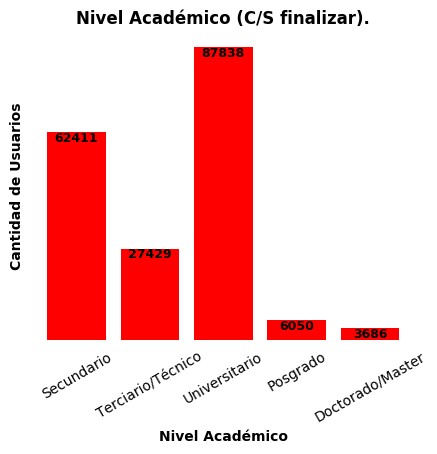

In [24]:
tox=toplot.NivelAcademico.tolist()
height = toplot.Cantidad.tolist()

fig, ax = plt.subplots(figsize=(5,4))
rects1 = ax.bar(tox, height , color='r')

def autolabel(rects):
#### funcion que realiza etiquetas
    for rect in rects:
        height = rect.get_height() #### obtiene la altura de la barra
        ax.text(rect.get_x() + rect.get_width()/2. #### posiciona el label horizontalmente
                , height - 3800, #### posiciona el label verticalmente
                '%d' % int(height),
                ha='center',
                va='bottom',
                fontweight='bold',
               fontsize= 9)


###rcParams['font.size'] = 12
###rcParams['font.family'] = 'FreeSans'
### Codigo para cambiar las fonts del grafico.

################### visualizacion de estilo tufteano minimalista ######################
#####################################################################################
ax.set_title('Nivel Académico (C/S finalizar).',fontweight='bold')
#ax.set_xticks(ind + width / 2)
ax.set_xticklabels( ('','Secundario', 'Terciario/Técnico','Universitario', 'Posgrado', 'Doctorado/Master'))
#ax.set_xticks([])
ax.set_yticks([])
### Remuevo los ejes pero conservo las labels
ax.set_ylabel('Cantidad de Usuarios',fontweight='bold')
ax.set_xlabel('Nivel Académico',fontweight='bold')
### pongo los nombres
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
### remuevo los bordes
plt.xticks(rotation=30)
### giro los textos del eje x
ax.xaxis.set_ticks_position('none')
#####################################################################################
#####################################################################################

### saco los breaks

autolabel(rects1)
### aplico la funcion autolabel para poner la cantidad
### sobre cada barra
plt.show()

#### Finalizados VS (EnCurso y Abandonado)

In [13]:
sindup = ps.sort_values(['nombre','estado'], ascending=False).drop_duplicates('idpostulante')

In [14]:
sindup[:3]

,idpostulante,nombre,estado,fechanacimiento,sexo
677,eo2p,5,3,1981-02-16,M
680,8BkL,5,3,1976-07-21,F
694,6Kbl,5,3,1976-09-03,M


In [15]:
hvsm = sindup.groupby('sexo')['sexo'].count()
hvsm = pd.DataFrame(hvsm)
hvsm.columns = ['cantidad']

In [18]:
hvsm.index.tolist()
hvsm.cantidad.tolist()

[96424, 88285, 2705]

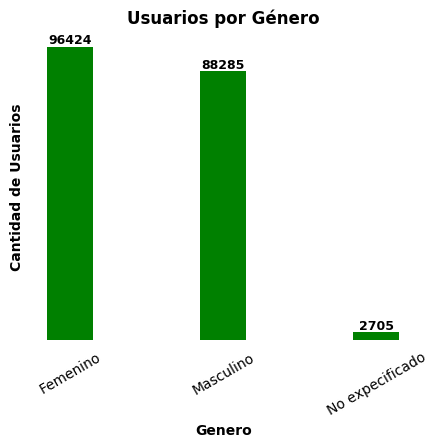

In [25]:
tox=hvsm.index.tolist()
height = hvsm.cantidad.tolist()

fig, ax = plt.subplots(figsize=(5,4))
rects1 = ax.bar(tox, height , color='g', width = 0.3)

def autolabel(rects):
#### funcion que realiza etiquetas
    for rect in rects:
        height = rect.get_height() #### obtiene la altura de la barra
        ax.text(rect.get_x() + rect.get_width()/2. #### posiciona el label horizontalmente
                , height , #### posiciona el label verticalmente
                '%d' % int(height),
                ha='center',
                va='bottom',
                fontweight='bold',
               fontsize= 9)

###[f.name for f in matplotlib.font_manager.fontManager.ttflist]
###rcParams['font.size'] = 12
###rcParams['font.family'] = 'FreeSans'
### Codigo para cambiar las fonts del grafico.

################### visualizacion de estilo tufteano minimalista ######################
#####################################################################################
ax.set_title('Usuarios por Género',fontweight='bold')
#ax.set_xticks(ind + width / 2)
ax.set_xticklabels( ('Femenino','Masculino', 'No expecificado'))
#ax.set_xticks([])
ax.set_yticks([])
### Remuevo los ejes pero conservo las labels
ax.set_ylabel('Cantidad de Usuarios',fontweight='bold')
ax.set_xlabel('Genero',fontweight='bold')
### pongo los nombres
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
### remuevo los bordes
plt.xticks(rotation=30)
### giro los textos del eje x
ax.xaxis.set_ticks_position('none')
#####################################################################################
#####################################################################################

### saco los breaks
plt.savefig("nivelAcademicoGenero2.png", dpi=500)
autolabel(rects1)
### aplico la funcion autolabel para poner la cantidad
### sobre cada barra
plt.show()

In [26]:
sindup = sindup.drop('fechanacimiento',axis=1)

In [27]:
bynombre = sindup.groupby('nombre')['nombre'].count()

In [28]:
bynombre = pd.DataFrame(bynombre)
bynombre.columns = ['cantidad']

In [29]:
mujeres = sindup.loc[sindup['sexo'] == 'F']
mujeresg = mujeres.groupby('nombre')['nombre'].count()
mujeresg = pd.DataFrame(mujeresg)
mujeresg.columns = ['Mujeres']

In [30]:
hombres = sindup.loc[sindup['sexo'] == 'M']
hombresg = hombres.groupby('nombre')['nombre'].count()
hombresg = pd.DataFrame(hombresg)
hombresg.columns = ['Hombres']

In [31]:
encurso = sindup.loc[sindup['estado'] == 1]
encurso = encurso.groupby('nombre')['nombre'].count()
encurso = pd.DataFrame(encurso)
encurso.columns = ['enCurso']

In [32]:
bynombre['Mujeres'] = mujeresg['Mujeres']
bynombre['Hombre'] = hombresg['Hombres']

In [33]:
bynombre

,cantidad,Mujeres,Hombre
nombre,,,
1,62411,28060,33162
2,27429,15593,11480
3,87838,48298,38455
4,6050,3003,3004
5,3686,1470,2184


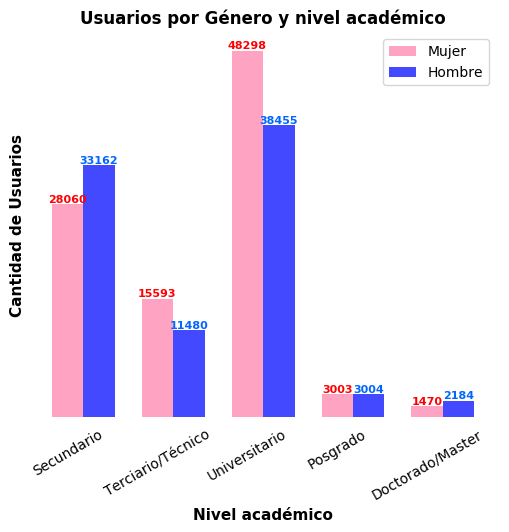

In [73]:
x1=bynombre.index.tolist()
y1=bynombre.cantidad.tolist()
y2=bynombre.Mujeres.tolist()
y3=bynombre.Hombre.tolist()

ind = np.arange(5)
ancho = 0.35
fig, ax = plt.subplots(figsize=(6,5))
rects2 = ax.bar(ind, y2 , color='#FFA3C3', width = 0.35)
rects3 = ax.bar(ind + ancho , y3, color='#4249FF', width =0.35)

def autolabel(rects,offset,col):
#### funcion que realiza etiquetas
#### el offset las corre verticalmente 
#### el col le cambia el color a la etiqueta
    for rect in rects:
        height = rect.get_height() #### obtiene la altura de la barra
        bottom = rect.get_y()
        ax.text(rect.get_x() + rect.get_width()/2. #### posiciona el label horizontalmente
                , height + bottom + offset, #### posiciona el label verticalmente
                '%d' % int(height),
                ha='center',
                va='bottom',
                fontweight='bold',
                color = col,
               fontsize= 8)

################### visualizacion de estilo tufteano minimalista ######################
#####################################################################################
ax.set_title('Usuarios por Género y nivel académico',fontweight='bold',fontsize=12)
#ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('','Secundario', 'Terciario/Técnico','Universitario', 'Posgrado', 'Doctorado/Master'))
#ax.set_xticks([])
ax.set_yticks([])
### Remuevo los ejes pero conservo las labels
ax.set_ylabel('Cantidad de Usuarios',fontweight='bold',fontsize=11)
ax.set_xlabel('Nivel académico',fontweight='bold',fontsize=11)
### pongo los nombres
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
### remuevo los bordes
plt.xticks(rotation=30)
### giro los textos del eje x
ax.xaxis.set_ticks_position('none')
ax.legend((rects2[0], rects3[0]), ('Mujer', 'Hombre'))
#####################################################################################
#####################################################################################

### saco los breaks

autolabel(rects2,0, "#ff0000")
autolabel(rects3,0, "#0066ff")


plt.savefig("nivelAcademicoGenero1.png", bbox_inches='tight', dpi=300)
### aplico la funcion autolabel para poner la cantidad
### sobre cada barra
plt.show()

In [45]:
sindup[:3]

,idpostulante,nombre,estado,sexo
677,eo2p,5,3,M
680,8BkL,5,3,F
694,6Kbl,5,3,M


In [46]:
acadef = sindup.loc[sindup['sexo'] == 'F']
acadef = acadef.drop(['sexo'],axis=1)

In [47]:
aver= acadef.groupby(['nombre','estado']).count().sort_index(ascending = False)

In [49]:
academ = sindup[sindup['sexo'] == 'M']
academ = academ.drop(['sexo'],axis=1)

In [50]:
aver1= academ.groupby(['nombre','estado']).count().sort_index(ascending = False)

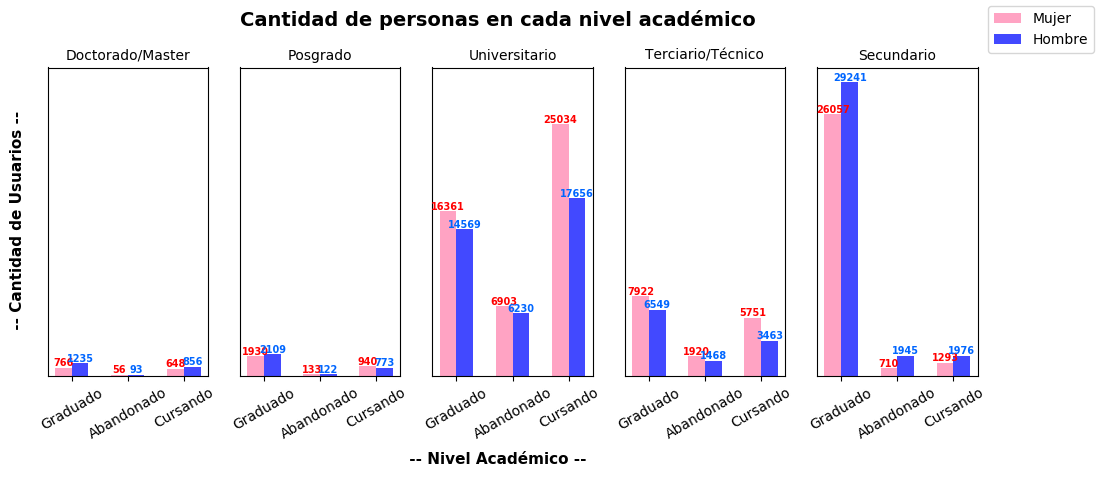

In [75]:
def autolabel(ax,rects,offset,col):
#### funcion que realiza etiquetas<
#### el offset las corre verticalmente 
#### el col le cambia el color a la etiqueta
    for rect in rects:
        height = rect.get_height() #### obtiene la altura de la barra
        bottom = rect.get_y()
        ax.text(rect.get_x() + rect.get_width()/2. #### posiciona el label horizontalmente
                , height + bottom + offset, #### posiciona el label verticalmente
                '%d' % int(height),
                ha='center',
                va='bottom',
                fontweight='bold',
                color = col,
               fontsize= 7)

x1=aver.index.tolist()
y1=aver.idpostulante.tolist()
y2=aver1.idpostulante.tolist()
xlab = ["Graduado", "Abandonado", "Cursando"] 
textlabel = ['Doctorado/Master','Posgrado','Universitario','Terciario/Técnico','Secundario']

ind = np.arange(3)
ancho = 0.3
#ax=[ax1, ax2, ax3, ax4, ax5]
fig, ax = plt.subplots(1, 5, sharex=True, sharey=True)
fig.set_size_inches(12, 4)

for i in range(5):
    rect1 = ax[i].bar(ind + ancho , y2[i*3:i*3+3], color='#4249FF', width= ancho)
    rect2 = ax[i].bar(ind, y1[i*3:i*3+3] , color='#FFA3C3', width= ancho)
    plt.setp(ax[i].get_xticklabels(), rotation=30)
    ax[i].set_xticks(ind + ancho / 2)
    ax[i].set_xticklabels(xlab)
    autolabel(ax[i],rect2,0, "#ff0000")
    autolabel(ax[i],rect1,0, "#0066ff")
    ax[i].set_yticks([])
    ax[i].set_title(textlabel[i],fontsize=10)
    
    
fig.text(0.5, -0.1, ' -- Nivel Académico -- ', ha='center', va='center',fontweight='bold',fontsize = 11)
fig.text(0.1, 0.5, ' -- Cantidad de Usuarios -- ', ha='center', va='center', rotation='vertical',fontweight='bold',fontsize = 11)
fig.text(0.5, 1, 'Cantidad de personas en cada nivel académico', ha='center', va='center',fontweight='bold',fontsize = 14)
fig.legend((rect2[0],rect1[0]), ('Mujer', 'Hombre'))

plt.savefig("nivelAcademicoGenero2.png", dpi=300, bbox_inches='tight')


plt.show()